In [27]:
# Initialize Otter
import otter
from docutils.utils import column_width
from setuptools.wheel import unpack

grader = otter.Notebook("hw03.ipynb")

# Homework 3: Table Manipulation and Visualization

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/fa24/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Reading**: 
* [Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, **please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is **due Wednesday, 9/18 at 5:00pm PT**. Submissions after this time will be accepted for 24 hours and will incur a 20% penalty. Any submissions later than this 24 hour period will not be accepted unless an extension has been granted as per the [policies](http://data8.org/fa24/policies/) page. Turn it in by Tuesday, 9/17 at 5:00pm PT for 5 extra credit points.

<span style="color:red">**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**</span>

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the [policies](http://data8.org/fa24/policies/#learning-cooperatively) page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday through Friday in [Warren Hall](https://www.berkeley.edu/map?warren). The office hours schedule appears on our [office hours page](https://www.data8.org/fa24/schedule/).

In [28]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. Unemployment

The Great Recession of 2008-2009 was a period of economic decline observed globally, with scale and timing varying from country to country. In the United States, it resulted in a rapid rise in unemployment that affected industries and population groups to different extents.

The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. *Non-Employment Index (or NEI)*: Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.
2. *NEI-PTER*: Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

---

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`. **(4 Points)**

_Hint:_ After loading in the CSV file, the `unemployment` table should look like this:

<img src="unemployment.png" width="20%"/>


In [29]:
unemployment = Table.read_table("unemployment.csv")
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [30]:
    grader.check("q1_1")

q1_1 results: All test cases passed!

---

**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead. **(4 Points)**


In [31]:
by_nei = unemployment.sort("NEI", descending=True)
by_nei_pter = unemployment.sort("NEI-PTER", descending=True)

In [32]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In [33]:
# Run this cell to check your by_nei table. You do not need to change the code.
by_nei.show(5)

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664


In [34]:
# Run this cell to check your by_nei_pter table. You do not need to change the code.
by_nei_pter.show(5)

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497


---

**Question 3.** Using `take`, assign `greatest_nei` to a table containing the data for the 11 quarters when NEI was greatest.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a quarter. **(4 Points)**


In [35]:
greatest_nei = by_nei.take(np.arange(11))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [36]:
grader.check("q1_3")

q1_3 results: All test cases passed!

---

**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (included in the NEI) plus the percentage of people who are PTER.

Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.) **(4 Points)**

*Note:* Use the original `unemployment` table for this.


In [37]:
pter = unemployment.column("NEI-PTER") - unemployment.column("NEI")
pter

array([ 1.0746,  1.1644,  1.1555,  1.129 ,  1.2139,  1.0757,  1.1282,
        1.1114,  1.0529,  1.0744,  1.1004,  1.0747,  1.0705,  1.0455,
        1.008 ,  0.9734,  0.9753,  0.8931,  0.9451,  0.8367,  0.8208,
        0.8105,  0.8248,  0.7578,  0.7251,  0.7445,  0.7543,  0.7423,
        0.7399,  0.7687,  0.8418,  0.9923,  0.9181,  0.9629,  0.9703,
        0.9575,  1.0333,  1.0781,  1.0675,  1.0354,  1.0601,  1.01  ,
        1.0042,  1.0368,  0.9704,  0.923 ,  0.9759,  0.93  ,  0.889 ,
        0.821 ,  0.9409,  0.955 ,  0.898 ,  0.8948,  0.9523,  0.9579,
        1.0149,  1.0762,  1.2873,  1.4335,  1.7446,  1.8415,  1.9315,
        1.8859,  1.8257,  1.9067,  1.8376,  1.8473,  1.7993,  1.8061,
        1.7651,  1.7927,  1.7286,  1.6387,  1.6808,  1.6805,  1.6629,
        1.6253,  1.6477,  1.6298,  1.4796,  1.5131,  1.4866,  1.4345,
        1.3675,  1.3097,  1.2319,  1.1735,  1.1844,  1.1746])

In [38]:
grader.check("q1_4")

q1_4 results: All test cases passed!

---

**Question 5.** Add `pter` as a column to `unemployment` (name the column `PTER`) and sort the resulting table by that column in descending order.  Call the resulting table `by_pter`.

Try to do this with a single line of code, if you can. **(4 Points)**


In [39]:
by_pter = unemployment.with_column("PTER", pter).sort("PTER", descending=True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [40]:
grader.check("q1_5")

q1_5 results: All test cases passed!

---

**Question 6.** Create a line plot of PTER over time. To do this, create a new table called `pter_over_time` with the same columns as the `unemployment` table with the addition of two new columns: `Year` and `PTER` using the `year` array and the `pter` array, respectively. Then, generate a line plot using one of the table methods you've learned in class.

The order of the columns matter for our correctness tests, so be sure `Year` comes before `PTER`. **(4 Points)**

*Note:* When constructing `pter_over_time`, do not just add the `year` column to the `by_pter` table. Please follow the directions in the question above.


(0.0, 2.0)

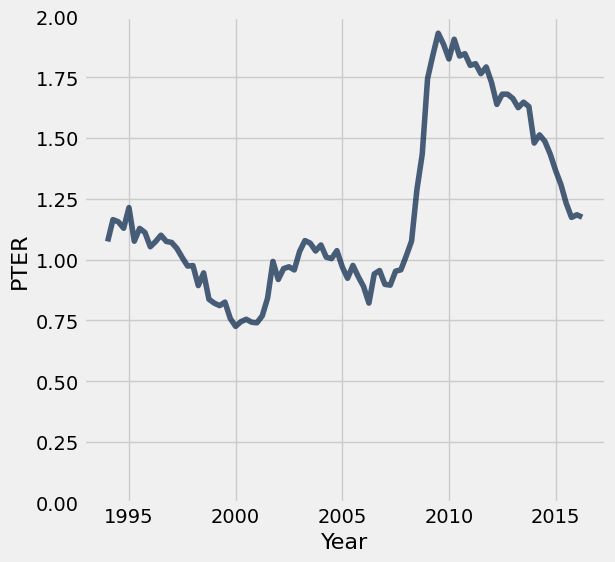

In [89]:
year = 1994 + np.arange(unemployment.num_rows)/4

# Add Year and PTER to the END of the table
pter_over_time = unemployment.with_columns(
    "Year", year,
    "PTER", pter
)

# Plotting
pter_over_time.plot("Year", "PTER")
plt.ylim(0, 2)  # Do not change this line


In [43]:
grader.check("q1_6")

q1_6 results: All test cases passed!

---

**Question 7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign `highPTER` to `True` if you think PTER rates were high in this period, or `False` if you think they weren't. **(4 Points)**


In [44]:
highPTER = True

In [45]:
grader.check("q1_7")

q1_7 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. Birth Rates

The following table gives Census-based population estimates for each US state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico and the District of Columbia.**

The data was taken from [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv). (Note: If the file doesn't download for you when you click the link, you can copy and paste the link address it into your address bar!) If you want to read more about the different column descriptions, click [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf).

The raw data is a bit messy—run the cell below to clean the table and make it easier to work with.

In [46]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(10)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"
4,Colorado,"5,448,819","5,540,545","67,453","37,121","60,773",621
1,Connecticut,"3,584,730","3,576,452","35,848","30,638","-12,822",-666
3,Delaware,"944,076","952,065","10,922","8,945","5,583",429
3,District of Columbia,"670,377","681,170","9,779","5,455","6,392",77
3,Florida,"20,244,914","20,612,439","222,793","201,485","325,986","20,231"


---

**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the total population size at the start of the time period. **(4 Points)**

_Hint:_ Remember that each row in the `pop` table refers to a state, not the US as a whole.


In [47]:
us_birth_rate = pop.column("BIRTHS").sum() / pop.column("2015").sum()
us_birth_rate

0.012358536498646102

In [48]:
grader.check("q2_1")

q2_1 results: All test cases passed!

---

**Question 2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state. **(4 Points)**

*Hint*: `migration_rates` should be a table and `movers` should be a number.


In [80]:
migration_rates = pop.with_column(
    "Rate", abs(pop.column("MIGRATION") / pop.column("2015"))
)

movers = migration_rates.where("Rate", are.above(0.01)).num_rows
movers


9

In [79]:
grader.check("q2_2")

q2_2 results: All test cases passed!

---

**Question 3.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). **(4 Points)**

*Hint:* Make sure you double check the type of the values in the `REGION` column and appropriately filter (i.e. the types must match!).


In [85]:
west_births = pop.where("REGION", are.equal_to(4)).column("BIRTHS").sum()
west_births

979657

In [86]:
grader.check("q2_3")

q2_3 results: All test cases passed!

---

**Question 4.** In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between annual birth and death rates across multiple states in the United States?

1. Line Graph
2. Bar Chart
3. Scatter Plot

Assign `visualization` below to the number corresponding to the correct visualization. **(4 Points)**


In [90]:
visualization = 3

In [91]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

--- 

**Question 5.** In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table containing the birth and death rates for each state. **(4 Points)**

Things to consider:

- What type of chart will help us illustrate an association between 2 variables?
- How can you manipulate a certain table to help generate your chart?
- Check out the [Recommended Reading](https://inferentialthinking.com/chapters/07/Visualization.html) for this homework!


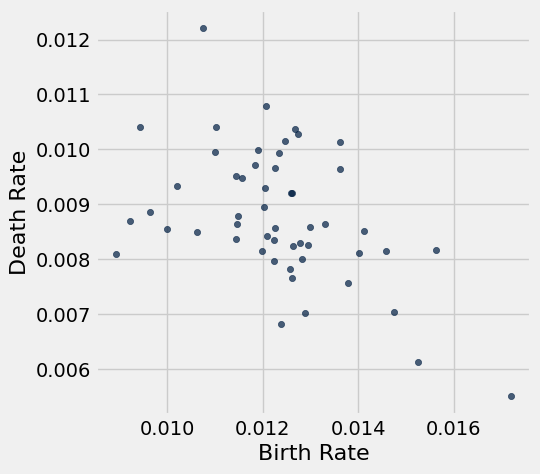

In [92]:
# In this cell, use birth_rates and death_rates to generate your visualization
birth_rates_2015 = pop.column('BIRTHS') / pop.column('2015')
death_rates_2015 = pop.column('DEATHS') / pop.column('2015')

rates = Table().with_columns(
    "Birth Rate", birth_rates_2015,
    "Death Rate", death_rates_2015
)

# Plot the scatter plot to check association
rates.scatter("Birth Rate", "Death Rate")

<!-- END QUESTION -->

---

**Question 6.** True or False: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. **(4 Points)**


In [93]:
assoc = False

In [94]:
grader.check("q2_6")

q2_6 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3. Uber

**Note:** We recommend reading [Chapter 7.2](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html) of the textbook before starting on Question 3.

Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://www.uber.com/newsroom/introducing-uber-movement-2/) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride in minutes.

In [58]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


<!-- BEGIN QUESTION -->

--- 

**Question 1.** Produce a histogram that visualizes the distributions of all ride times in Boston using the given bins in `equal_bins`. **(4 Points)**

*Hint:* See [Chapter 7.2](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html) if you're stuck on how to specify bins.

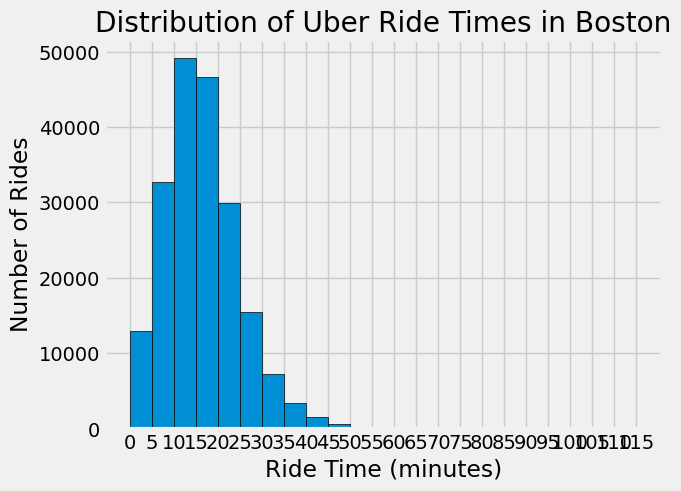

In [102]:
import matplotlib.pyplot as plt

boston = Table.read_table("boston.csv")
equal_bins = np.arange(0, 120, 5)
ride_time = boston.column("ride time")

# Plot histogram
plt.hist(ride_time, bins=equal_bins, edgecolor='black')
plt.title('Distribution of Uber Ride Times in Boston')
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Number of Rides')
plt.xticks(equal_bins)  # Show bins on x-axis
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---

**Question 2.** Now, produce a histogram that visualizes the distribution of all ride times in Manila using the given bins. **(4 Points)**


([<matplotlib.axis.XTick at 0x152b5e2b0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95'),
  Text(100, 0, '100'),
  Text(105, 0, '105'),
  Text(110, 0, '110'),
  Text(115, 0, '115')])

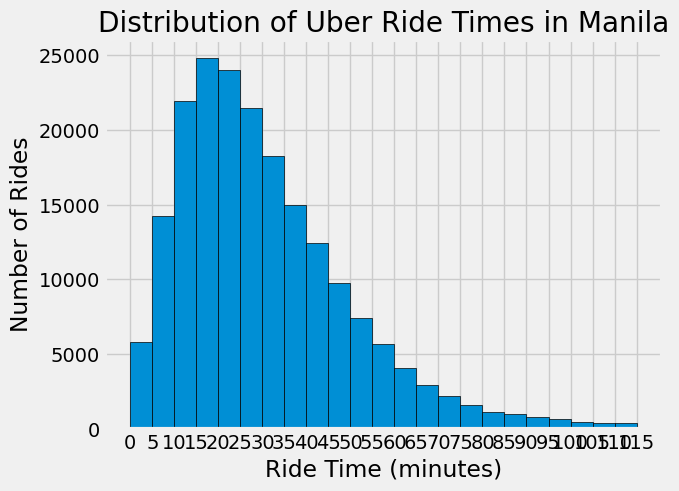

In [118]:
equal_bins = np.arange(0, 120, 5)

mania = Table.read_table("manila.csv")
ride_time_mania = mania.column("ride time")

plt.hist(ride_time_mania, bins=equal_bins, edgecolor='black')
plt.title('Distribution of Uber Ride Times in Manila')
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Number of Rides')
plt.xticks(equal_bins)

# Don't delete the following line!

<!-- END QUESTION -->

---

**Question 3.** Let's take a closer look at the y-axis label. Assign `unit_meaning` to an integer (1, 2, 3) that corresponds to the "unit" in "Percent per unit". **(4 Points)**

1. minute  
2. ride time  
3. second


In [110]:
unit_meaning = 3
unit_meaning

3

In [111]:
grader.check("q3_3")

q3_3 results: All test cases passed!

---

**Question 4.** Assign `boston_under_15` and `manila_under_15` to the percentage of rides that are less than 15 minutes in their respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables, numbers, and mathematical operations. You should **not** access the tables `boston` and `manila` in any way. **(4 Points)**

> ***Note:*** that the height variables (i.e. `boston_under_5`) represent the height of the bin it describes.


In [114]:
boston_under_5_bin_height = 1.2
manila_under_5_bin_height = 0.6
boston_5_to_under_10_bin_height = 3.2
manila_5_to_under_10_bin_height = 1.4
boston_10_to_under_15_bin_height = 4.9
manila_10_to_under_15_bin_height = 2.2

# Sum up heights for under 15 minutes for Boston and Manila
boston_under_15 = boston_under_5_bin_height + boston_5_to_under_10_bin_height + boston_10_to_under_15_bin_height
manila_under_15 = manila_under_5_bin_height + manila_5_to_under_10_bin_height + manila_10_to_under_15_bin_height

boston_under_15, manila_under_15


(9.3, 4.2)

In [115]:
grader.check("q3_4")

q3_4 results: All test cases passed!

---

**Question 5.** Let's take a closer look at the distribution of ride times in Boston. Assign `boston_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time. **(4 Points)**

1. 0-8 minutes  
2. 8-14 minutes  
3. 14-20 minutes  
4. 20-40 minutes  

*Hint:* The median of a sorted list has half of the list elements to its left, and half to its right.


In [116]:
boston_median_bin = 3
boston_median_bin

3

In [117]:
grader.check("q3_5")

q3_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 6.** Identify one difference between the histograms, in terms of the statistical properties. 
> *Hint*: Without performing any calculations, can you comment on the average or skew of each histogram? **(4 Points)**


2 main things to keep in mind: average (the center of the data), skewness (the leaness of data: left right or balanced)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

--- 

**Question 7.** Why is your solution in Question 6 the case? Based on one of the following two readings, why are the distributions for Boston and Manila different? **(4 Points)**

- [Boston reading](https://www.climatestotravel.com/climate/united-states/boston)
- [Manila reading](https://manilafyi.com/why-is-manila-traffic-so-bad/)

*Hint:* Try thinking about external factors of the two cities that may be causing the difference! The readings provide some potential factors -- try to connect them to the ride time data.


manila has stupid traffic design

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 4. Histograms

Consider the following scatter plot: 

![Alt text](scatter.png "Scatter plot showing data points for the variables 'x' and 'y'. The data are symmetric about the x-axis centered at 0 and symmetric about the y-axis centered at 0, but with no data in the [-0.5, 0.5] range on the y-axis.")

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given three histograms—one corresponds to column `x`, one corresponds to column `y`, and one does not correspond to either column. 

**Histogram A:**
 
![Alt text](var3.png "Symmetrical, bell-shaped histogram centered around 0")

**Histogram B:**

![Alt text](var1.png "Symmetrical histogram with two peaks at -1 and 1 but no data around 0")

**Histogram C:**

![Alt text](var2.png "Asymmetrical histogram with a peak around -0.5 and a right skew")

---

**Question 1.** Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1, 2, or 3. **(5 Points)**

1. Histogram A
2. Histogram B
3. Histogram C


In [119]:
histogram_column_x = 2

In [120]:
grader.check("q4_1")

q4_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 2.** State at least one reason why you chose the histogram from Question 1. **Make sure to clearly indicate which histogram you selected** (ex: "I chose histogram A because ..."). **(5 Points)**


cause I see what I see, I want it and I take it

<!-- END QUESTION -->

---

**Question 3.** Suppose we run `t.hist('y')`. Which histogram does this code produce? Assign `histogram_column_y` to either 1, 2, or 3. **(5 Points)**

1. Histogram A
2. Histogram B
3. Histogram C


In [121]:
histogram_column_y = 1

In [122]:
grader.check("q4_3")

q4_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 4.** State at least one reason why you chose the histogram from Question 3.  **Make sure to clearly indicate which histogram you selected** (ex: "I chose histogram A because ..."). **(5 Points)**


I see what I saw and I kinda like it tho

<!-- END QUESTION -->

You're done with Homework 3!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final two cells**. 
3. Click the link to download the zip and pdf file.
4. Go to [Gradescope](https://www.gradescope.com) and submit the zip file to the corresponding assignment. The name of this assignment is "Homework 3 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Pets of Data 8
**Sparky** says congrats on finishing HW 3!

<img src="./izzy.jpeg" width="40%" alt="Sparky th Maltipoo sleeping on couch"/>

## Submission

Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. You are responsible for submitting both the coding portion (the zip) and the written portion (the PDF) to their respective Gradescope portals. **Please save before exporting!**

> **Important: You must correctly assign the pages of your PDF after you submit to the correct gradescope assignment. If your pages are not correctly assigned and/or not in the correct PDF format by the deadline, we reserve the right to award no points for your written work.**

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by colicking on `File -> Save and Export Notebook As... -> PDF`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit those. Either way, **you are responsible for ensuring your submision follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

**You must submit the PDF generated via one of these methods, we will not accept screenshots or Word documents.**

In [123]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'hw03'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if path.exists(f'{name}.pdf'):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")

PandocMissing: Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [124]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_3 results: All test cases passed!

    q1_4 results: All test cases passed!

    q1_5 results: All test cases passed!

    q1_6 results: All test cases passed!

    q1_7 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_2 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_6 results: All test cases passed!

    q3_3 results: All test cases passed!

    q3_4 results: All test cases passed!

    q3_5 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_3 results: All test cases passed!
